# Описание данных и задание SQL

**Таблица** books

Содержит данные о книгах:

    book_id — идентификатор книги;
    author_id — идентификатор автора;
    title — название книги;
    num_pages — количество страниц;
    publication_date — дата публикации книги;
    publisher_id — идентификатор издателя.

**Таблица** authors

Содержит данные об авторах:

    author_id — идентификатор автора;
    author — имя автора.
        
**Таблица** publishers

Содержит данные об издательствах:

    publisher_id — идентификатор издательства;
    publisher — название издательства;

**Таблица** ratings

Содержит данные о пользовательских оценках книг:

    rating_id — идентификатор оценки;
    book_id — идентификатор книги;
    username — имя пользователя, оставившего оценку;
    rating — оценка книги.

**Таблица** reviews

Содержит данные о пользовательских обзорах на книги:

    review_id — идентификатор обзора;
    book_id — идентификатор книги;
    username — имя пользователя, написавшего обзор;
    text — текст обзора.

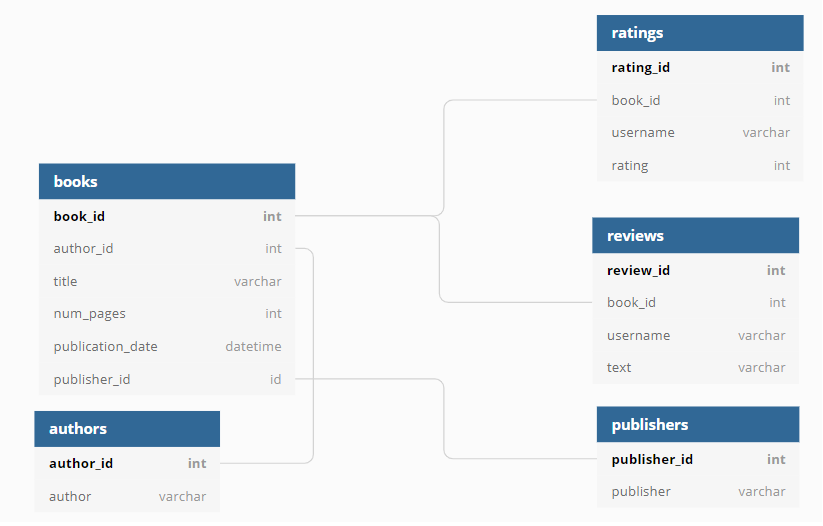

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Исследуйте таблицы — выведите первые строки

In [2]:
# выводим первые 5 строк таблицы books
query = '''SELECT * FROM books LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
# выводим первые 5 строк таблицы authors
query = '''SELECT * FROM authors LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [4]:
# выводим первые 5 строк таблицы publishers
query = '''SELECT * FROM publishers LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [5]:
# выводим первые 5 строк таблицы ratings
query = '''SELECT * FROM ratings LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
# выводим первые 5 строк таблицы reviews
query = '''SELECT * FROM reviews LIMIT 5'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Посчитайте, сколько книг вышло после 1 января 2000 года

In [7]:
query = ''' SELECT count(*) AS count_books
            FROM books 
            WHERE publication_date > '2000-01-01' '''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count_books
0,819


**Вывод:** После 1 января 2000 года вышло 819 книг

## Для каждой книги посчитайте количество обзоров и среднюю оценку

In [8]:
query = ''' SELECT b.book_id, 
                   b.title,
                   COALESCE(re.count, 0) AS count_reviews,
                   ROUND(ra.avg_rating, 1) AS avg_rating
            FROM books AS b
            LEFT JOIN (
                SELECT book_id, COUNT(review_id) AS count
                FROM reviews
                GROUP BY book_id
            ) AS re ON b.book_id = re.book_id
            LEFT JOIN (
                SELECT book_id, AVG(rating) AS avg_rating
                FROM ratings
                GROUP BY book_id
            ) AS ra ON b.book_id = ra.book_id
            ORDER BY b.book_id ASC '''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,title,count_reviews,avg_rating
0,1,'Salem's Lot,2,3.7
1,2,1 000 Places to See Before You Die,1,2.5
2,3,13 Little Blue Envelopes (Little Blue Envelope...,3,4.7
3,4,1491: New Revelations of the Americas Before C...,2,4.5
4,5,1776,4,4.0
...,...,...,...,...
995,996,Wyrd Sisters (Discworld #6; Witches #2),3,3.7
996,997,Xenocide (Ender's Saga #3),3,3.4
997,998,Year of Wonders,4,3.2
998,999,You Suck (A Love Story #2),2,4.5


**Вывод:** По всем 1000 книг посчитал количество обзоров и среднюю оценку

## Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [9]:
query = ''' SELECT p.publisher, count(b.book_id) AS book_count
            FROM books b 
            LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
            WHERE b.num_pages >= 50
            GROUP BY p.publisher
            ORDER BY book_count DESC
            LIMIT 1; '''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher,book_count
0,Penguin Books,42


**Вывод:** Издательство, которое выпустило наибольшее число книг толще 50 страниц называется Penguin Books оно выпустило 42 книги.

## Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [10]:
query = ''' SELECT a.author, round(avg(rating), 2) AS avg_rating
            FROM books b 
            LEFT JOIN authors a USING (author_id)
            LEFT JOIN ratings r2 USING (book_id)
            WHERE b.book_id IN (SELECT r.book_id
                                FROM ratings r 
                                GROUP BY r.book_id 
                                HAVING count(rating) >=50)
            GROUP BY a.author 
            ORDER BY avg_rating DESC 
            LIMIT 1; '''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29


**Вывод:** Автором с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками, является J.K. Rowling/Mary GrandPré, со средним рейтингом 4.29.

## Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [11]:
query = ''' SELECT AVG(count_review) AS average_reviews
            FROM (SELECT re.username, COUNT(re.review_id) AS count_review
                  FROM reviews re 
                  WHERE re.username IN (SELECT ra.username
                                        FROM ratings ra 
                                        GROUP BY ra.username
                                        HAVING COUNT(ra.rating_id) > 48
                                        )
                  GROUP BY re.username
                  ) AS subquery; '''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)


,average_reviews
0,24.0


**Вывод:** Среднее количество обзоров от пользователей, которые поставили больше 48 оценок, 24 обзора.